In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\rines\Downloads\archive (9)\Titanic-Dataset.csv")  # Replace with your path

In [4]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [9]:
print(df['Age'].isnull().sum())      
print(df['Embarked'].isnull().sum())  

0
0


In [10]:
print(df[['Age', 'Embarked']].head(10))  

    Age Embarked
0  22.0        S
1  38.0        C
2  26.0        S
3  35.0        S
4  35.0        S
5  28.0        Q
6  54.0        S
7   2.0        S
8  27.0        S
9  14.0        C


In [11]:
# Label Encoding for binary columns
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [18]:
print(df[['Age', 'Sex']])  # Shows both columns

      Age  Sex
0    22.0    0
1    38.0    1
2    26.0    1
3    35.0    1
4    35.0    0
..    ...  ...
886  27.0    0
887  19.0    1
888  28.0    1
889  26.0    0
890  32.0    0

[891 rows x 2 columns]


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

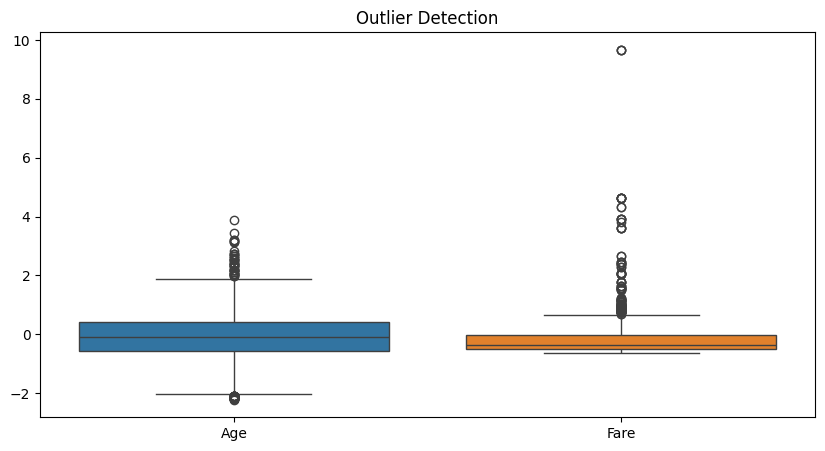

In [21]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Outlier Detection')
plt.show()

# Remove outliers using IQR
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Fare']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [22]:
print(df.shape)
print(df.isnull().sum())
print(df.head())


(721, 12)
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0 -0.565736      1      0   
2                        Heikkinen, Miss. Laina    1 -0.258337      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1      0   
4                      Allen, Mr. William Henry    0  0.433312      0      0   
5                              Moran, Mr. James    0 -0.104637      0      0   

             Ticket      Fare  Embarked_Q  Embarked_S  
0         A/5 21171